In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import r2_score

In [119]:
import pipeline as pp
import importlib
importlib.reload (pp)
import pipeline as pp

## Parameters

In [139]:
MDataFiles_Stage1_path = 'Data_ML/MDataFiles_Stage1/'
start = 1985

# Datasets to add
data = ['features/stats_v1_processed.csv', 
        'features/Elos_pipeline_uniques.csv', 
        'features/features_reg_season2_processed.csv']

# Features where the difference needs to be computed
diff = ['elo_score', 'Seed', 'Pourcentage_V_terrain_adverse', 'Mental', 
        'Evolution_2_Last_years', 'Blocks', 'Steals']

model_type = 'LR'

# RF estimators
n_estimators=250

## Prediction

In [140]:
dfs = []
for s in [2015, 2016, 2017, 2018, 2019]:
    p = pp.pipeline(path=MDataFiles_Stage1_path,  season=s, start = start)
    for d in data:
        p.add_team_data(d)
    if len(diff)>0:
        p.compute_differences(diff)
    p.train_model(n_estimators=n_estimators, model_type=model_type)
    dfs.append(p.predict(out=None))
pred = pd.concat(dfs)
pred.head(10)

3832 matches in history
History merged with features/stats_v1_processed.csv
History merged with features/Elos_pipeline_uniques.csv
History merged with features/features_reg_season2_processed.csv
Difference computed on elo_score
Difference computed on Seed
Difference computed on Pourcentage_V_terrain_adverse
Difference computed on Mental
Difference computed on Evolution_2_Last_years
Difference computed on Blocks
Difference computed on Steals
32 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training time: 0.213338s
4556 matches to predict generated
Generated matches merged with features/stats_v1_processed.csv
Generated matches merged with features/Elos_pipeline_uniques.csv
Generated matches merged with features/features_reg_season2_processed.csv
Matches predicted for 2015

3966 matches in history
History merged with features/stats_v1_processed.csv
History merged with features/Elos_pipeline_uniques.csv
History merged with features/features_reg_season2_processed.csv
Difference computed on elo_score
Difference computed on Seed
Difference computed on Pourcentage_V_terrain_adverse
Difference computed on Mental
Difference computed on Evolution_2_Last_years
Difference computed on Blocks
Difference computed on Steals
32 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training time: 0.198713s
4556 matches to predict generated
Generated matches merged with features/stats_v1_processed.csv
Generated matches merged with features/Elos_pipeline_uniques.csv
Generated matches merged with features/features_reg_season2_processed.csv
Matches predicted for 2016

4100 matches in history
History merged with features/stats_v1_processed.csv
History merged with features/Elos_pipeline_uniques.csv
History merged with features/features_reg_season2_processed.csv
Difference computed on elo_score
Difference computed on Seed
Difference computed on Pourcentage_V_terrain_adverse
Difference computed on Mental
Difference computed on Evolution_2_Last_years
Difference computed on Blocks
Difference computed on Steals
32 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training time: 0.153571s
4556 matches to predict generated
Generated matches merged with features/stats_v1_processed.csv
Generated matches merged with features/Elos_pipeline_uniques.csv
Generated matches merged with features/features_reg_season2_processed.csv
Matches predicted for 2017

4234 matches in history
History merged with features/stats_v1_processed.csv
History merged with features/Elos_pipeline_uniques.csv
History merged with features/features_reg_season2_processed.csv
Difference computed on elo_score
Difference computed on Seed
Difference computed on Pourcentage_V_terrain_adverse
Difference computed on Mental
Difference computed on Evolution_2_Last_years
Difference computed on Blocks
Difference computed on Steals
32 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training time: 0.167494s
4556 matches to predict generated
Generated matches merged with features/stats_v1_processed.csv
Generated matches merged with features/Elos_pipeline_uniques.csv
Generated matches merged with features/features_reg_season2_processed.csv
Matches predicted for 2018

4368 matches in history
History merged with features/stats_v1_processed.csv
History merged with features/Elos_pipeline_uniques.csv
History merged with features/features_reg_season2_processed.csv
Difference computed on elo_score
Difference computed on Seed
Difference computed on Pourcentage_V_terrain_adverse
Difference computed on Mental
Difference computed on Evolution_2_Last_years
Difference computed on Blocks
Difference computed on Steals
32 features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training time: 0.230022s
4556 matches to predict generated
Generated matches merged with features/stats_v1_processed.csv
Generated matches merged with features/Elos_pipeline_uniques.csv
Generated matches merged with features/features_reg_season2_processed.csv
Matches predicted for 2019



,Année,ID_Team1,ID_Team2,Predic_Team1
0,2015,1437,1438,0.436910
1,2015,1437,1328,0.483017
2,2015,1437,1257,0.262660
3,2015,1437,1320,0.454814
4,2015,1437,1344,0.511890
5,2015,1437,1277,0.543856
6,2015,1437,1301,0.175159
7,2015,1437,1261,0.211244
8,2015,1437,1208,0.176652
9,2015,1437,1129,0.228840


In [141]:
t0=time.time()
df = pred

results = {}
for index, row in df.iterrows():
    i, j = row['ID_Team1'], row['ID_Team2']
    season = row['Année']
    p = 1-row['Predic_Team1']
    
    if i> j:
        i, j = j, i
        p = 1-p
    if (i, j, season) not in results.keys():
        results[(i, j, season)]=[p]
    else:
        results[(i, j, season)].append(p)

data = []
for k, v in results.items():
    d = {
        "Année":int(k[2]),
        "ID_Team1":int(k[0]),
        "ID_Team2":int(k[1]),
        "Pred_1":v[0],
        "Pred_2":v[1],
        "Predic_Team1":(v[0]+v[1])/2
    }
    data.append(d)
data = pd.DataFrame(data)
print("Execution time: %fs"%(time.time() - t0))
data.head()

Execution time: 5.564396s


,Année,ID_Team1,ID_Team2,Pred_1,Pred_2,Predic_Team1
0,2015,1437,1438,0.563090,0.466740,0.514915
1,2015,1328,1437,0.483017,0.587865,0.535441
2,2015,1257,1437,0.262660,0.357866,0.310263
3,2015,1320,1437,0.454814,0.560957,0.507885
4,2015,1344,1437,0.511890,0.614374,0.563132


Correlation: 	0.945875
R² score: 	0.894462


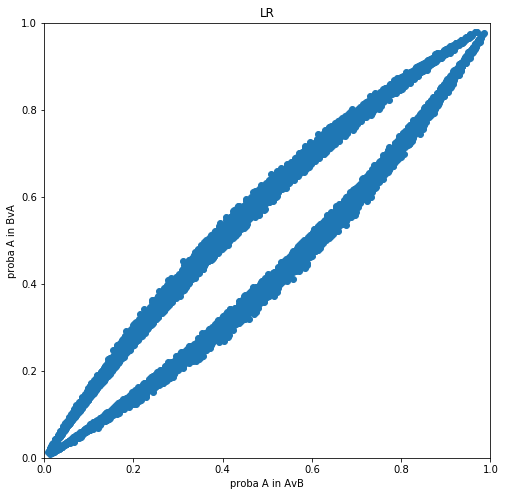

In [142]:
plt.figure(figsize=(8, 8))
plt.scatter(data['Pred_1'], data['Pred_2'])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("proba A in AvB")
plt.ylabel("proba A in BvA")
plt.title(model_type)

r2 = r2_score(data['Pred_1'], data['Pred_2'])
corr = np.corrcoef(data['Pred_1'], data['Pred_2'])
print("Correlation: \t%4f\nR² score: \t%4f" %(corr[0][1], r2))

In [143]:
reduced_data = data.drop(columns=['Pred_1', 'Pred_2'])
reduced_data.sort_values(['Année', 'ID_Team1', 'ID_Team2'], inplace=True)

#On crée notre fichier de soumission
submission_file=pd.DataFrame(columns=['ID', 'Pred'], index=[str(j) for j in range(11390)])

# On le remplit
sub = pd.DataFrame()
sub['ID'] = reduced_data['Année'].astype(str) + '_' + reduced_data['ID_Team1'].astype(str) + '_' + reduced_data['ID_Team2'].astype(str)
sub['Pred']= reduced_data['Predic_Team1']
sub.head()

,ID,Pred
884,2015_1107_1112,0.051600
887,2015_1107_1116,0.095183
885,2015_1107_1124,0.183430
847,2015_1107_1125,0.335552
628,2015_1107_1129,0.237476


In [144]:
sub.to_csv("submission/sub_LR_statsv1_ELO_season2.csv", index=False)

## Data Transformation

In [17]:
elo = pd.read_csv( 'features/Elos_pipeline.csv')
elo.drop_duplicates().to_csv('features/Elos_pipeline_uniques.csv', index=False)

In [128]:
seas = pd.read_csv('features/features_reg_season2.csv')
seas.head()

,TeamID,Season,Moyenne_diff_score,Pourcentage_V_terrain_adverse,Mental,Evolution_2_Last_years,Fools,Blocks,Steals,Qualité_Défense,Qualité_Attaque,Confiance,Ancienneté
0,1101,2014,-15.476190,0.066667,-0.285714,0.050000,4.190476,0.333333,1.761905,33.240896,63.142857,-14.476190,0
1,1101,2015,-10.857143,0.125000,-1.250000,0.050000,9.607143,1.107143,3.000000,42.014706,61.000000,-8.857143,1
2,1101,2016,-6.407407,0.250000,-0.833333,0.238095,15.370370,1.962963,4.444444,39.912854,69.851852,-2.407407,2
3,1101,2017,-4.760000,0.352941,-0.070588,0.110000,15.360000,1.880000,4.720000,43.724706,67.880000,1.240000,3
4,1101,2018,-2.148148,0.555556,1.111111,0.111111,16.666667,3.703704,5.074074,45.727669,70.666667,7.851852,4


In [130]:
seas.drop(columns = ['Confiance', 'Moyenne_diff_score', 'Fools', 'Ancienneté', 
           'Qualité_Attaque', 'Qualité_Défense']).to_csv('features/features_reg_season2_processed.csv', index=True)

In [136]:
df = pd.read_csv('features/stats_v1.csv', index_col=0)
df[['Season', 'TeamID', 'Seed']].to_csv('features/stats_v1_processed.csv', index=True)

In [83]:
pd.read_csv('features/features_reg_season_processed.csv', index_col=0).head()

,Victoires_MM,TeamID,Season,Pourcentage_Victoire,Buts_moyens_encaissés,Buts_moyens_marqués,Moyenne_diff_score,Pourcentage_V_terrain_adverse,Mental,Evolution_2_Last_years,Qualité_défense,Fools,Blocks,Steals,Ancienneté
0,2.0,1101,2014,0.095238,78.619048,63.142857,-15.476190,0.066667,-0.285714,0.050000,0.619162,4.190476,0.333333,1.761905,0
1,2.0,1101,2015,0.250000,71.857143,61.000000,-10.857143,0.125000,-1.250000,0.050000,0.598150,9.607143,1.107143,3.000000,1
2,2.0,1101,2016,0.333333,76.259259,69.851852,-6.407407,0.250000,-0.833333,0.238095,0.684949,15.370370,1.962963,4.444444,2
3,2.0,1101,2017,0.360000,72.640000,67.880000,-4.760000,0.352941,-0.070588,0.110000,0.665613,15.360000,1.880000,4.720000,3
4,2.0,1101,2018,0.444444,72.814815,70.666667,-2.148148,0.555556,1.111111,0.111111,0.692939,16.666667,3.703704,5.074074,4


## Issues analysis
Tools to check why it doesn't work

In [27]:
def filter_ts(df, teamID, season):
    a = df[df['TeamID']==teamID]
    return  a[a['Season']==season]

In [28]:
df = pd.read_csv(data[0])
filter_ts(df, 1314, 1985)

,Victoires_MM,TeamID,Season,Nombre_victoires,Nombre_défaites,Nombre_matchs,Pourcentage_Victoire,Buts_moyens_encaissés,Buts_moyens_marqués,Moyenne_diff_score,Pourcentage_V_terrain_adverse,Mental,Evolution_2_Last_years,Qualité_défense,Fools,Blocks,Steals,Ancienneté


In [10]:
len(p.match_histo)

4210

In [9]:
len(p.results_histo)

3832

In [17]:
h = p.match_histo['Nombre_victoires_Team1']

In [18]:
len(h)

3832

In [19]:
h.count()

2056